In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [16]:
X_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma')
X_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma')
y_test = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma')
y_train = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma')

[]

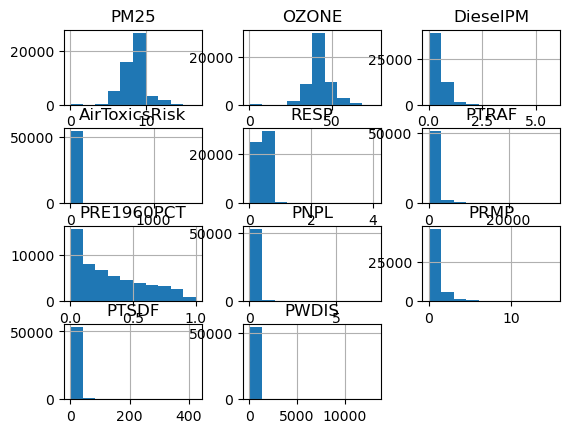

In [26]:
X_train.hist()
plt.plot()

In [18]:
X_test.set_index('CensusTract', inplace=True)
X_train.set_index('CensusTract', inplace=True)
y_test.set_index('CensusTract', inplace=True)
y_train.set_index('CensusTract', inplace=True)


In [19]:
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)
y_train.shape


(54242,)

In [20]:
X_test.shape

(18081, 11)

In [21]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
34001010403,7.367790,42.683730,0.270750,25.997500,0.370442,276.557182,0.113820,0.606326,0.023621,1.023876,0.000000
12009064400,7.441957,31.635196,0.404162,28.767412,0.421161,265.197995,0.081084,0.089128,0.666353,0.650670,0.000000
36067010200,6.126674,38.134998,0.273680,21.685292,0.268528,158.051760,0.213232,0.054709,0.065434,0.091733,0.000137
22051021300,8.897398,37.102196,0.864184,56.793938,0.555000,312.222180,0.243171,0.055795,0.249290,2.842095,0.000000
56021000300,4.942090,51.246733,0.426470,16.674490,0.254559,369.266221,0.316813,0.171198,0.433149,1.947524,0.053605


In [22]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
45045002905,9.218632,42.432010,0.437587,42.797994,0.555932,116.146188,0.059431,0.111265,1.430894,3.723781,9.340378e-05
23019007200,5.480731,32.707033,0.090776,20.703235,0.253421,147.360359,0.203873,0.023173,0.205648,0.257422,8.166893e-07
22109000700,8.271858,33.984420,0.457610,40.204311,0.528250,631.912988,0.357798,0.314533,0.796118,4.365424,2.934346e-02
12031002902,8.525349,35.396559,0.634498,35.927295,0.656640,339.121897,0.694382,1.537420,5.416626,0.977925,1.564409e-02
41067031908,9.580904,37.130092,0.405429,35.615286,0.537506,113.205731,0.004695,0.050769,0.848018,2.453090,1.083414e-03


In [23]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


In [24]:
# Instantiate RandomForestRegressor and randomly search for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {'n_estimators': sp_randInt(1,500), 'max_depth':sp_randInt(1,30)}

rs = RandomizedSearchCV(rf, params)

In [25]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16d608610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16d5dd3a0>})

In [20]:
rs.best_estimator_

RandomForestRegressor(max_depth=1, n_estimators=188)

In [25]:
rf = RandomForestRegressor(max_depth=26, n_estimators=386)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=26, n_estimators=386)

In [26]:
y_pred = rf.predict(X_test)

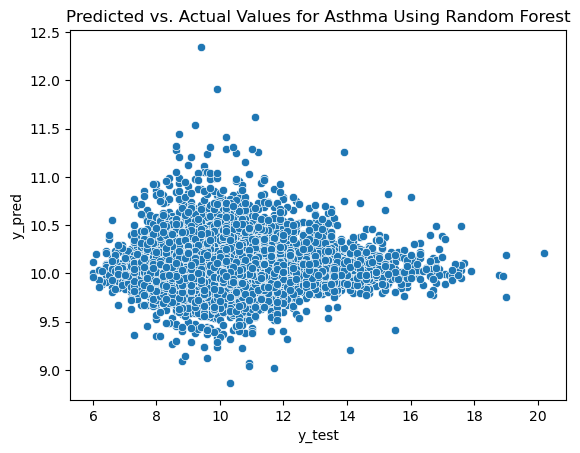

In [27]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title('Predicted vs. Actual Values for Asthma Using Random Forest')
_ = ax.set_xlabel('y_test')
_ = ax.set_ylabel('y_pred')

In [28]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.01143795151566418
MAE: 1.177681529332875
MSE: 2.386309952049623
RMSE: 1.5447685755638685


This is the best model so far although the results are still not very good.

The next model I will try is a support vector machine regressor.

In [3]:
# Instantiate support vector machine regressor and randomly search for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': sp_randFloat(.01,10), 'epsilon':sp_randFloat(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [11]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x105eadb50>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x148bdf640>})

In [12]:
svm_rs.best_estimator_

SVR(C=9.758131857482118, epsilon=0.9168171272503549)

In [13]:
svm = SVR(C=9.758131857482118, epsilon=0.9168171272503549)
svm.fit(X_train, y_train)

SVR(C=9.758131857482118, epsilon=0.9168171272503549)

In [ ]:
y_pred = svm.predict(X_test)

In [14]:
print('R2 score:', r2_score(y_test, y_pred)  )
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

0.1874958057839976

The very low R2 value shows that SVM regression is not a good predictor for this data.